# Stock Market Sentiment Analysis  



In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore')

import spacy 

import requests 
from bs4 import BeautifulSoup 
import re

# Extracting HTML Contents  

It will be used the website: https://finviz.com/

Finding the user agent.

In [25]:
user_agent = 'You can find it by typing "My user agent" in the search bar of your browser'

In [26]:
company = 'AAPL' 
url = 'https://finviz.com/quote.ashx?t={}&p=d'.format(company)
request = requests.get(url, headers={'User-Agent':user_agent}) 

Checking the URL

In [27]:
url

'https://finviz.com/quote.ashx?t=AAPL&p=d'

Checking whether the request was created properly. 

In [28]:
request.ok

True

# Parsing the Web Content 

In [29]:
parser = BeautifulSoup(request.text, 'html.parser') 
news_html = parser.find_all('a',{'class':'tab-link-news'})
news_html[:2]

[<a class="tab-link-news" href="https://finance.yahoo.com/m/0b145d91-bebe-3401-9032-2b24b4042350/why-amazon%2C-paypal%2C-and-apple.html" onclick="trackAndOpenNews(event, 'Motley Fool', 'https://finance.yahoo.com/m/0b145d91-bebe-3401-9032-2b24b4042350/why-amazon%2C-paypal%2C-and-apple.html');" rel="nofollow" target="_blank">Why Amazon, PayPal, and Apple Are No-Brainer Buys Right Now</a>,
 <a class="tab-link-news" href="https://finance.yahoo.com/news/look-apple-broadcom-deal-puts-150700029.html" onclick="trackAndOpenNews(event, 'Zacks', 'https://finance.yahoo.com/news/look-apple-broadcom-deal-puts-150700029.html');" rel="nofollow" target="_blank">Take a Look Into How Apple-Broadcom Deal Puts ETFs in Focus</a>]

In order to take only the news, it is possible to use a regular expression.  
It seems that the news'contents are included between target="_blank" and </a>.

In [30]:
regex = "target=\"_blank\"\>(.*)\<\/a\>"
regex_news = [re.findall(regex, str(sentence)) for sentence in news_html]
regex_news

[['Why Amazon, PayPal, and Apple Are No-Brainer Buys Right Now'],
 ['Take a Look Into How Apple-Broadcom Deal Puts ETFs in Focus'],
 ['Is Apple Stock Overbought? The Answer May Surprise You.'],
 ["Walmart's Grocery Success and Other Retail News"],
 ['3 Things About Meta Platforms That Smart Investors Know'],
 ['The Killer Apps That Could Make Apples New Headset a Winner'],
 ['Apples Mixed-Reality Headset Is Still Virtual. Heres What We May Know About It.'],
 ['AI Stocks Are Flying, but Dont Call the Craze a Bubble'],
 ['Top Analyst Reports for Apple, Chevron &amp; Accenture'],
 ['Louis Navelliers 2023 Portfolio: 15 Growth Stocks to Watch'],
 ['3 AI Stocks Warren Buffett Is Betting On'],
 ['30 Best PC Games of All Time'],
 ['Best Dow Jones Stocks To Buy And Watch In May 2023: Microsoft Rallies To New High'],
 ["Warren Buffett Stocks: What's Inside Berkshire Hathaway's Portfolio?"],
 ["Judge rejects challenges to Apple's $50M butterfly keyboard settlement"],
 ["US judge rejects challenge

Storing the news into a dataframe.

In [31]:
# Creating the Lists to Append

news_list = []

for x in regex_news:
    news_list.append(x[0])


# Creating the Dictionary 

news_dict = {}
news_dict['Company'] = company
news_dict['News'] = news_list 

# Converting into a Dataframe 
apple = pd.DataFrame(news_dict)

In [32]:
apple

,Company,News
0,AAPL,"Why Amazon, PayPal, and Apple Are No-Brainer B..."
1,AAPL,Take a Look Into How Apple-Broadcom Deal Puts ...
2,AAPL,Is Apple Stock Overbought? The Answer May Surp...
3,AAPL,Walmart's Grocery Success and Other Retail News
4,AAPL,3 Things About Meta Platforms That Smart Inves...
...,...,...
95,AAPL,Apple inks multibillion-dollar deal with Broad...
96,AAPL,Apple Stock Has Been on Fire. So Why Did It Ju...
97,AAPL,Apple closes in on a $3 trillion stock market ...
98,AAPL,Heres Why Apple (AAPL) Outperformed in Q1


# Storing the Process into a Function 

In [33]:
def company_news(firm): 
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'
    url = 'https://finviz.com/quote.ashx?t={}&p=d'.format(firm)
    request = requests.get(url, headers={'User-Agent':user_agent})
    parser = BeautifulSoup(request.text, 'html.parser') 
    news_html = parser.find_all('a',{'class':'tab-link-news'})
    regex = "target=\"_blank\">(.*?)<\/a>" 
    regex_news = [re.findall(regex, str(sentence)) for sentence in news_html] 

    # Creating the Lists to Append

    news_list = []
    for x in regex_news:
        news_list.append(x[0])

    # Creating the Dictionary 

    news_dict = {} 
    news_dict['Company'] = firm
    news_dict['News'] = news_list 

    # Converting into a Dataframe 

    final_df = pd.DataFrame(news_dict)
    return final_df 

In [34]:
microsoft_df = company_news('MSFT')
microsoft_df

,Company,News
0,MSFT,12 Best Software Infrastructure Stocks to Buy
1,MSFT,1 Green Flag and 1 Red Flag for AMD in 2023
2,MSFT,Q1 Earnings: Can Artificial Intelligence (AI) ...
3,MSFT,"Microsoft: Buy, Sell, or Hold?"
4,MSFT,Dow Jones Today: Index Up on Debt Ceiling Hopes
...,...,...
95,MSFT,2 Leading Tech Stocks to Buy in 2023 and Beyond
96,MSFT,2 Robinhood Stocks With Market-Beating Potential
97,MSFT,Nvidia Has Had Numerous Updates Before Earning...
98,MSFT,Former OpenAI Execs Secure $450 Million Fundin...


Creating a Dataframe with 5 companies from different sectors:  

- **Amazon** --> AMZN  
- **Netflix** --> NFLX  
- **Intel Corporation** --> INTC  
- **Tesla** --> TSLA  
- **Eni** --> E

Creating a unique dataframe for all of them.

In [35]:
companies_df = pd.DataFrame()
tickers = ['AMZN', 'NFLX', 'INTC', 'TSLA', 'E']

for c in tickers: 
    new_df = company_news(c)
    companies_df = pd.concat([companies_df, new_df])

In [36]:
companies_df

,Company,News
0,AMZN,Billionaire Stanley Druckenmillers 2023 Portfo...
1,AMZN,"Why Amazon, PayPal, and Apple Are No-Brainer B..."
2,AMZN,12 Best Software Infrastructure Stocks to Buy
3,AMZN,Eighty-two percent of millennials worry AI wil...
4,AMZN,Walmart's Grocery Success and Other Retail News
...,...,...
95,E,Why Eni SpA (E) is a Top Growth Stock for the ...
96,E,Eni SpA (E) Gains But Lags Market: What You Sh...
97,E,Do Options Traders Know Something About Eni (E...
98,E,"Zacks Industry Outlook Highlights Exxon Mobil,..."


Checking whether there are 100 news per company.

In [37]:
companies_df.Company.value_counts()

AMZN    100
NFLX    100
INTC    100
TSLA    100
E       100
Name: Company, dtype: int64

Resetting the Index

In [38]:
companies_df = companies_df.reset_index().drop(columns='index')
companies_df

,Company,News
0,AMZN,Billionaire Stanley Druckenmillers 2023 Portfo...
1,AMZN,"Why Amazon, PayPal, and Apple Are No-Brainer B..."
2,AMZN,12 Best Software Infrastructure Stocks to Buy
3,AMZN,Eighty-two percent of millennials worry AI wil...
4,AMZN,Walmart's Grocery Success and Other Retail News
...,...,...
495,E,Why Eni SpA (E) is a Top Growth Stock for the ...
496,E,Eni SpA (E) Gains But Lags Market: What You Sh...
497,E,Do Options Traders Know Something About Eni (E...
498,E,"Zacks Industry Outlook Highlights Exxon Mobil,..."


Random checking if all the news are reported correctly.

In [39]:
companies_df.News[58]

'How to Become a Millionaire by Age 30: 12 Tips from Experts'

In [40]:
companies_df.News[321]

'Ford, Tesla Shares Rise After Unveiling Electric Car Charging Partnership'

In [41]:
companies_df.News[220]

'Intel Has a Golden Opportunity in the Graphics Card Market'

# Applying Sentiment Analysis   

It will be used the roBERTa model from HuggingFace.

In [42]:
!pip install transformers
from transformers import AutoTokenizer 
from transformers import AutoModelForSequenceClassification 
from scipy.special import softmax 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
pre_trained_model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(pre_trained_model)
model = AutoModelForSequenceClassification.from_pretrained(pre_trained_model)

Encoding text. It will be used a PyTorch Tensor for making the model working properly. 

In [44]:
def roberta_scores(row):
    try: 
        # Tokenizing the text and putting it into the model 

        tokenized_text = tokenizer(row['News'], return_tensors='pt')
        model_output = model(**tokenized_text)

        # Taking only the scores from the Tensors and putting them in a NumPy array 
        
        scores = model_output[0][0].detach().numpy() 

        # Applying the Softmax function to obtain the probability distribution 

        scores = softmax(scores) 

        # Storing the results into a dictionary 

        scores_dict = {
            'negative_score':scores[0],
            'neutral_score':scores[1],
            'positive_score':scores[2] 
        }

        return scores_dict 
    except:
        return 'Text too big'

Applying the function to the "News" variable of the "companies_df".

In [45]:
companies_df['Sentiment_Scores'] = companies_df.apply(roberta_scores, axis=1)

In [46]:
companies_df 

,Company,News,Sentiment_Scores
0,AMZN,Billionaire Stanley Druckenmillers 2023 Portfo...,"{'negative_score': 0.010702377, 'neutral_score..."
1,AMZN,"Why Amazon, PayPal, and Apple Are No-Brainer B...","{'negative_score': 0.4138568, 'neutral_score':..."
2,AMZN,12 Best Software Infrastructure Stocks to Buy,"{'negative_score': 0.012116473, 'neutral_score..."
3,AMZN,Eighty-two percent of millennials worry AI wil...,"{'negative_score': 0.66737837, 'neutral_score'..."
4,AMZN,Walmart's Grocery Success and Other Retail News,"{'negative_score': 0.006720684, 'neutral_score..."
...,...,...,...
495,E,Why Eni SpA (E) is a Top Growth Stock for the ...,"{'negative_score': 0.0021453153, 'neutral_scor..."
496,E,Eni SpA (E) Gains But Lags Market: What You Sh...,"{'negative_score': 0.17554072, 'neutral_score'..."
497,E,Do Options Traders Know Something About Eni (E...,"{'negative_score': 0.3038257, 'neutral_score':..."
498,E,"Zacks Industry Outlook Highlights Exxon Mobil,...","{'negative_score': 0.010740129, 'neutral_score..."


Creating a columns for each score.

In [47]:
sentiment_dict = {}

for index, news in zip(companies_df.index, companies_df.Sentiment_Scores):
    sentiment_dict[index] = news 

sentiment_dict

{0: {'negative_score': 0.010702377,
  'neutral_score': 0.8207262,
  'positive_score': 0.16857138},
 1: {'negative_score': 0.4138568,
  'neutral_score': 0.48506397,
  'positive_score': 0.1010792},
 2: {'negative_score': 0.012116473,
  'neutral_score': 0.60953087,
  'positive_score': 0.37835258},
 3: {'negative_score': 0.66737837,
  'neutral_score': 0.31167707,
  'positive_score': 0.020944588},
 4: {'negative_score': 0.006720684,
  'neutral_score': 0.6455389,
  'positive_score': 0.34774032},
 5: {'negative_score': 0.08855581,
  'neutral_score': 0.74326134,
  'positive_score': 0.16818285},
 6: {'negative_score': 0.0011799939,
  'neutral_score': 0.036755994,
  'positive_score': 0.9620641},
 7: {'negative_score': 0.12166001,
  'neutral_score': 0.7229928,
  'positive_score': 0.15534729},
 8: {'negative_score': 0.004005306,
  'neutral_score': 0.15431371,
  'positive_score': 0.841681},
 9: {'negative_score': 0.020835891,
  'neutral_score': 0.5982054,
  'positive_score': 0.3809587},
 10: {'nega

In [48]:
pd.DataFrame(sentiment_dict)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
negative_score,0.010702,0.413857,0.012116,0.667378,0.006721,0.088556,0.001180,0.121660,0.004005,0.020836,...,0.102883,0.640194,0.634995,0.018928,0.189576,0.002145,0.175541,0.303826,0.010740,0.031084
neutral_score,0.820726,0.485064,0.609531,0.311677,0.645539,0.743261,0.036756,0.722993,0.154314,0.598205,...,0.873919,0.334841,0.344874,0.946838,0.788602,0.147636,0.774342,0.661146,0.806292,0.866747
positive_score,0.168571,0.101079,0.378353,0.020945,0.347740,0.168183,0.962064,0.155347,0.841681,0.380959,...,0.023198,0.024966,0.020131,0.034234,0.021821,0.850219,0.050117,0.035029,0.182968,0.102169


Transposing it.

In [49]:
sentiment_df = pd.DataFrame(sentiment_dict).T
sentiment_df

,negative_score,neutral_score,positive_score
0,0.010702,0.820726,0.168571
1,0.413857,0.485064,0.101079
2,0.012116,0.609531,0.378353
3,0.667378,0.311677,0.020945
4,0.006721,0.645539,0.347740
...,...,...,...
495,0.002145,0.147636,0.850219
496,0.175541,0.774342,0.050117
497,0.303826,0.661146,0.035029
498,0.010740,0.806292,0.182968


Merging the two dataframes.

In [50]:
final_df = companies_df.merge(sentiment_df, left_index=True, right_index=True) 
final_df

,Company,News,Sentiment_Scores,negative_score,neutral_score,positive_score
0,AMZN,Billionaire Stanley Druckenmillers 2023 Portfo...,"{'negative_score': 0.010702377, 'neutral_score...",0.010702,0.820726,0.168571
1,AMZN,"Why Amazon, PayPal, and Apple Are No-Brainer B...","{'negative_score': 0.4138568, 'neutral_score':...",0.413857,0.485064,0.101079
2,AMZN,12 Best Software Infrastructure Stocks to Buy,"{'negative_score': 0.012116473, 'neutral_score...",0.012116,0.609531,0.378353
3,AMZN,Eighty-two percent of millennials worry AI wil...,"{'negative_score': 0.66737837, 'neutral_score'...",0.667378,0.311677,0.020945
4,AMZN,Walmart's Grocery Success and Other Retail News,"{'negative_score': 0.006720684, 'neutral_score...",0.006721,0.645539,0.347740
...,...,...,...,...,...,...
495,E,Why Eni SpA (E) is a Top Growth Stock for the ...,"{'negative_score': 0.0021453153, 'neutral_scor...",0.002145,0.147636,0.850219
496,E,Eni SpA (E) Gains But Lags Market: What You Sh...,"{'negative_score': 0.17554072, 'neutral_score'...",0.175541,0.774342,0.050117
497,E,Do Options Traders Know Something About Eni (E...,"{'negative_score': 0.3038257, 'neutral_score':...",0.303826,0.661146,0.035029
498,E,"Zacks Industry Outlook Highlights Exxon Mobil,...","{'negative_score': 0.010740129, 'neutral_score...",0.010740,0.806292,0.182968


# EDA  

In [51]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           500 non-null    object 
 1   News              500 non-null    object 
 2   Sentiment_Scores  500 non-null    object 
 3   negative_score    500 non-null    float32
 4   neutral_score     500 non-null    float32
 5   positive_score    500 non-null    float32
dtypes: float32(3), object(3)
memory usage: 17.7+ KB


Checking the average values for each company.

In [52]:
final_df.groupby('Company')[['negative_score', 'neutral_score', 'positive_score']].mean()

,negative_score,neutral_score,positive_score
Company,,,
AMZN,0.110332,0.543631,0.346037
E,0.101841,0.689106,0.209053
INTC,0.143533,0.601872,0.254595
NFLX,0.213385,0.549340,0.237275
TSLA,0.156629,0.557751,0.285620


Checking the different scores'distirbution.

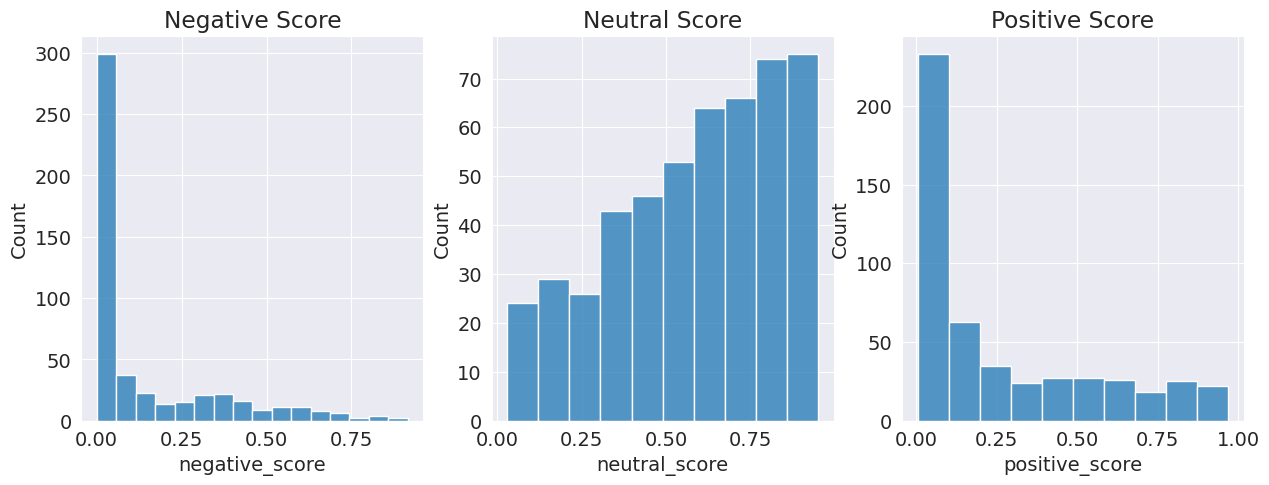

In [53]:
fig, ax = plt.subplots(1,3)

ax[0].set_title('Negative Score')
sns.histplot(data=final_df, x='negative_score', ax=ax[0])

ax[1].set_title('Neutral Score')
sns.histplot(data=final_df, x='neutral_score', ax=ax[1])

ax[2].set_title('Positive Score')
sns.histplot(data=final_df, x='positive_score', ax=ax[2]);

Both positive and negative scores appear to be right-skewed, on the contrary the neutral score is left-skewed.

Checking the best and the worst news.

In [54]:
final_df.sort_values('positive_score', ascending=False)[['News', 'positive_score']]

,News,positive_score
174,Netflix Stock Is Surging. Wall Street Is Excit...,0.969321
92,"Got $5,000? These Are 2 of the Best Growth Sto...",0.968688
6,3 Stocks I'm Excited to Buy in May,0.962064
482,Eni SpA (E) is an Incredible Growth Stock: 3 R...,0.961236
298,Apple Q2 earnings beat expectations on better ...,0.947086
...,...,...
316,Tesla could face a $3.3 billion fine over a ma...,0.008537
108,A Shocking Number of People Are Canceling Thei...,0.007930
295,AMD's Ryzen Sales Just Collapsed,0.007833
401,Executives Russian Ties Cause Stir at Italian ...,0.007729


In [55]:
final_df.News[479]

'E or FUPBY: Which Is the Better Value Stock Right Now?'

In [56]:
final_df.sort_values('negative_score', ascending=False)[['News', 'negative_score']]

,News,negative_score
383,How DeSantis tarnishes his own economic record,0.915809
108,A Shocking Number of People Are Canceling Thei...,0.870933
295,AMD's Ryzen Sales Just Collapsed,0.855520
107,This Is How Many People Are Canceling Their Ne...,0.823450
316,Tesla could face a $3.3 billion fine over a ma...,0.820184
...,...,...
92,"Got $5,000? These Are 2 of the Best Growth Sto...",0.001312
162,Netflix shares hit best close since 2022 as Wa...,0.001260
6,3 Stocks I'm Excited to Buy in May,0.001180
291,Intel Corporation (NASDAQ:INTC) is a favorite ...,0.001090


In [57]:
final_df.loc[284, 'negative_score']

0.028323574

In [58]:
final_df.News[284]

'Can Intel bounce back?'